# analysis of bombings in specific areas, THOR data

In [2]:
import os, io, random
import string
import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns
from collections import OrderedDict
import datetime as dt
import geopandas as gpd
import contextily as cx
from contextily.tile import warp_img_transform, warp_tiles, _warper

In [3]:
borders= gpd.read_file('SE_ASIA_PROVINCES_SV_NV_KH_LA.shp')
laosmap=borders[borders.COUNTRY=='LA']

In [4]:
#load pickle saved from analysis notebook
s = pd.read_pickle('thor_small.pkl')

In [5]:
gdf=gpd.GeoDataFrame(s, geometry=gpd.points_from_xy(s.TGTLONDDD_DDD_WGS84, s.TGTLATDD_DDD_WGS84),crs="EPSG:4326").dropna()

In [ ]:
gdf[:10]

## plot a region

In [8]:
lat = 105.762962
lon = 17.673904

x1,x2 = 100,110
y1,y2 = 13,23

def area_plot(sub, xlim, ylim, ax):
    
    borders.plot(column='COUNTRY',alpha=.2,lw=.5,ec='black',ax=ax)    
    sub.plot(color='red',markersize=2,alpha=.4,ax=ax) #column='WEAPONTYPE
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    cx.add_basemap(ax,crs=sub.crs)
    return

#area_plot(gdf, (100,110), (13,23))

<Axes: >

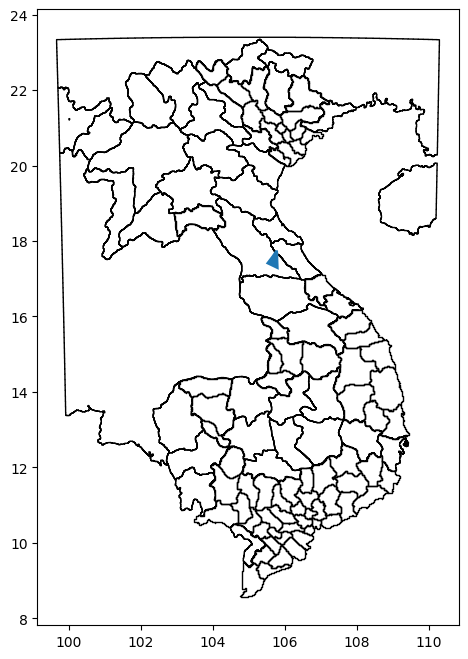

In [10]:
regions=gpd.read_file('polygons.shp')
f,ax=plt.subplots(1,1,figsize=(8,8))
borders.plot(color='none',ax=ax)
regions.plot(ax=ax)

In [11]:
poly = regions.iloc[0].geometry
print (poly)
idx = gdf.within(poly)
#create a new geoDataFrame that will have only the intersecting records
poly_gdf = gdf.loc[idx].copy()

POLYGON ((105.74836413277943 17.757200850295405, 105.81841884459753 17.751820355803222, 105.83875730931891 17.236704383436464, 105.47831451786786 17.401743192364588, 105.64441197975911 17.610793889351513, 105.64441197975911 17.610793889351513, 105.74836413277943 17.757200850295405))


In [ ]:
f,ax=plt.subplots(2,4,figsize=(20,10))
axs=ax.flat
i=0

for y in range(1965,1973):
    ax=axs[i]
    sub = poly_gdf[poly_gdf.YEAR==y]
    #sub = sub[sub.
    area_plot(sub, (lat-1,lat+1), (lon-1,lon+1), ax=ax)
    ax.set_title(y)
    ax.axis('off')
    i+=1

    
    